In [1]:
%matplotlib inline

# Руководство по использованию
---

# Содержание

* [Простой пример](#Простой-пример)

* [Части Figure](#Части-Figure)
    * [Figure](#Figure)
    * [Axes](#Axes)
    * [Axis](#Axis)
    * [Artist](#Artist)
    
* [Типы входных данных для функций построения графиков](#Типы-входных-данных-для-функций-построения-графиков)

* [Объектно-ориентированный интерфейс и интерфейс pyplot](#Объектно-ориентированный-интерфейс-и-интерфейс-pyplot)
    * [Стиль ОО](#Стиль-ОО)
    * [Стиль pyplot](#Стиль-pyplot)

## Простой пример
---


**Matplotlib** отображает ваши данные на [`figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure), каждый из которых может содержать один или несколько объектов [`axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#the-axes-class) (т. е.
область, в которой точки могут быть указаны в виде координат x-y или тета-r
на полярном графике или x-y-z на трехмерном графике и т. д.). Самый простой способ
создание фигуры с осями выполняется с помощью [`pyplot.subplots`](https://matplotlib.org/stable/api/axes_api.html#the-axes-class). Затем мы можем использовать
[`Axes.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib-axes-axes-plot) для рисования данных по осям:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

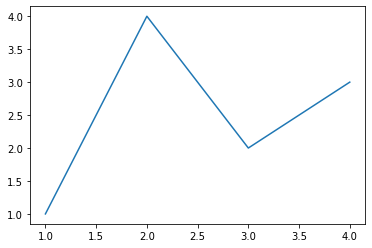

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

---
Для каждого метода построения графика класса [**Axes**](https://matplotlib.org/stable/api/axes_api.html#the-axes-class) существует соответствующая функция в модуле [**matplotlib.pyplot**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), которая выполняет этот график на «текущих» осях, создавая эти оси (и фигуру, содержащую его), если они еще не существуют. Итак, предыдущий пример можно записать короче как:

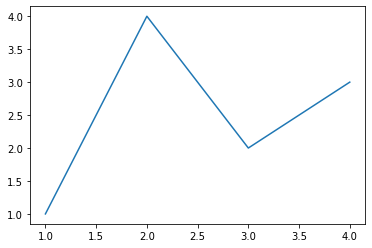

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

---
## Части Figure
---

Теперь давайте более подробно рассмотрим компоненты фигуры Matplotlib.

![](https://raw.githubusercontent.com/letimofeev/python_course/main/matplotlib/translated/images/figure_parts.png)

---
### Figure
---

**Вся** фигура. Фигура отслеживает все содержащиеся [**Axes**](https://matplotlib.org/stable/api/axes_api.html#the-axes-class), некоторые «особые» объекты (названия, легенды фигур и т. Д.) и холст. (Пользователю не нужно непосредственно взаимодействовать с холстом, поэтому не стоит заострять внимание на нем). Фигура может содержать любое количество [**Axes**](https://matplotlib.org/stable/api/axes_api.html#the-axes-class), но обычно есть по крайней мере одна.

Самый простой способ создать новую фигуру - использовать pyplot:

<Figure size 432x288 with 0 Axes>

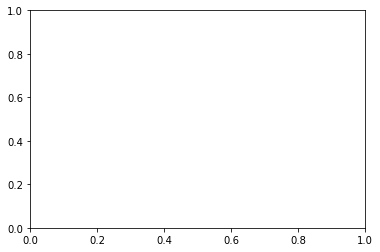

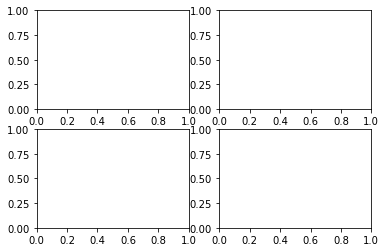

In [7]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

---
### Axes
---

Это то, что вы называете «графиком», это область изображения с пространством данных. Фигура может содержать много [Axes](https://matplotlib.org/stable/api/axes_api.html#the-axes-class), но данный объект [Axes](https://matplotlib.org/stable/api/axes_api.html#the-axes-class) может быть только на одной [фигуре](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure). Axes содержит два (или три в случае 3D) объекта [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib-axis) (помните о разнице между **Axes** и **Axis**), которые контролируют границы отображения (пределы данных также можно контролировать с помощью методов [axes.Axes.set_xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib-axes-axes-set-xlim) и [axes.Axes.set_ylim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib-axes-axes-set-ylim)). У каждой оси есть заголовок (устанавливается через [set_title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib-axes-axes-set-title)), x-метка (устанавливается через [set_xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib-axes-axes-set-xlabel)) и y-метка устанавливается через [set_ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib-axes-axes-set-ylabel)).

Класс [Axes](https://matplotlib.org/stable/api/axes_api.html#the-axes-class) и его функции-члены являются основной точкой входа в работу с OO-интерфейсом.

---

### Axis
---

Это объекты, похожие на числовые линии. Они нужны для установки пределов графика и генерации меток на оси и подписей к ним.   Расположение отметок определяется объектом [**Locator**](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator), а строки ярлыков форматируются с помощью объекта [**Formatter**](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter).   Комбинация правильного локатора и форматтера дает очень точный контроль над расположением отметок и метками. 

---

### Artist
---

По сути, все, что вы видите на рисунке, - это **Artist** (даже объекты **Figure, Axes и Axis**). Когда фигура визуализируется, все Artist обращаются к холсту. Большинство Artist привязаны к **Axes**; такой объект не может использоваться несколькими Axes или перемещаться.

---

## Типы входных данных для функций построения графиков
---

Все функции построения графиков ожидают ввода [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) или [numpy.ma.masked_array](https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_array.html#numpy-ma-masked-array). Классы, которые похожи на массивы, такие как объекты данных [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas) и [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix), могут работать или не работать должным образом. Лучше всего преобразовать их в объекты [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) до построения графика.

---

Например, преобразование [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame):

In [16]:
import pandas as pd

In [18]:
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values
a_asarray

array([[0.53800846, 0.50092008, 0.95185086, 0.2260521 , 0.806802  ],
       [0.38852614, 0.64424279, 0.41113658, 0.35981288, 0.87975605],
       [0.22647671, 0.11133849, 0.64646103, 0.15609715, 0.22953272],
       [0.6000882 , 0.79915115, 0.02733589, 0.29275013, 0.03457743]])

---
Преобразование [numpy.matrix](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix):

In [19]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

---
## Объектно-ориентированный интерфейс и интерфейс pyplot
---

Как отмечалось выше, есть два основных способа использования Matplotlib:  

Явно создавать фигуры и оси и вызывать их методы («объектно-ориентированный (ОО) стиль»).  
Использовать **pyplot** для автоматического создания фигур и осей и управления ими, а также функции pyplot для построения графиков.  

---

### Стиль ОО
---


In [2]:
import matplotlib.pyplot as plt
import numpy as np

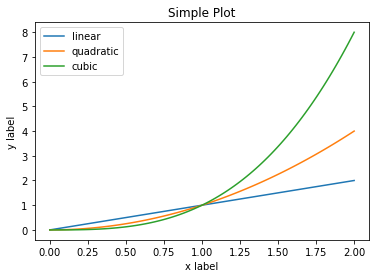

In [3]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

---
### Стиль pyplot
---

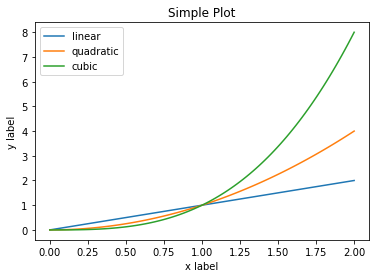

In [4]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

---
Обычно приходится строить одни и те же графики снова и снова, но с разными наборами данных, что приводит к необходимости писать специализированные функции для построения графиков.  

Рекомендуемая сигнатура функции выглядит примерно так:

In [5]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

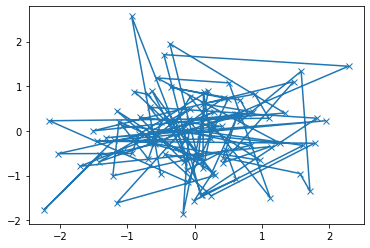

In [10]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

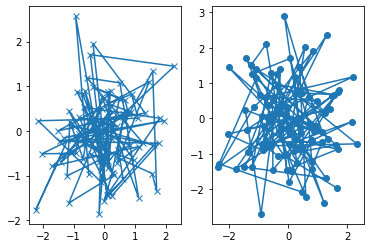

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})